# 라이브러리 불러오기

In [1]:
from time            import sleep
from IPython.display import Image

import numpy as np
from matplotlib import pyplot as plt

import cv2
import os
import pyautogui
import psutil
import pickle

import torch
import torchvision
import torch.nn.init
import torchvision.datasets   as dsets
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset # 텐서데이터셋
from torch.utils.data import DataLoader # 데이터로더

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


# 매치 ID 인식기

- match_id 위치: 380:410, 1192:1206 -> 30 * 14, difference=15 <br>
 img[380:410, 1192:1350]

In [2]:
# numbers = {"zero" : zero,
#            "one"  : one,
#            "two"  : two,
#            "three": three,
#            "four" : four,
#            "five" : five,
#            "six"  : six,
#            "seven": seven,
#            "eight": eight,
#            "nine" : nine}

In [3]:
# img = cv2.imread(f"images/match_id/train/match_id14.png", cv2.IMREAD_GRAYSCALE)

# zero = img[380:410, 1192+121:1206+121]
# one  = img[380:410, 1192+30:1206+30]
# two = img[380:410, 1192+60:1206+60]
# three = img[380:410, 1192+90:1206+90]
# four = img[380:410, 1192+105:1206+105]
# five = img[380:410, 1192:1206]
# six = img[380:410, 1192+120:1206+120]
# seven = img[380:410, 1192+75:1206+75]
# eight = img[380:410, 1192+135:1206+135]
# nine = img[380:410, 1192+75:1206+75]

# plt.imshow(img[380:410, 1192:1360])
# plt.imshow(img[380:410, 1192+75:1206+75])
# plt.imshow(nine)

# numbers = {0: zero,
#            1: one,
#            2: two,
#            3: three,
#            4: four,
#            5: five,
#            6: six,
#            7: seven,
#            8: eight,
#            9: nine}

# for key in numbers:
#     value = numbers[key]
#     cv2.imwrite(f"images/match_id/train/{key}.png", value)

In [4]:
# len(image[0])
# plt.imshow(image[5:30, 3:10])

In [5]:
# cv2.imread(f"images/match_id/train/match_id0{file_num}.png", cv2.IMREAD_GRAYSCALE)

In [6]:
numbers          = [n for n in range(10)]
match_id_train_x = []
root_difference  = 15
for i in range(10):
    file_num = i + 1
    if i + 1 < 10:
        image = cv2.imread(f"images/match_id/train/match_id0{file_num}.png", cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imread(f"images/match_id/train/match_id{file_num}.png", cv2.IMREAD_GRAYSCALE)
    y_start = 375 + i
    y_end   = 405 + i
    
    for j in range(6):
        x_start  = 1189 + j
        x_end    = 1203 + j
        
        time_images = []
        for k in range(10):
            difference = root_difference * k
            
            x_start += difference
            x_end   += difference

            time_image = image[y_start:y_end, x_start:x_end]
            time_images.append(time_image)

        match_id_train_x += time_images

In [7]:
match_id_train_y = [5, 5, 0, 9, 7, 5, 3, 9, 5, 9,
    5, 5, 1, 9, 0, 6, 7, 3, 5, 1,
    5, 5, 1, 1, 2, 2, 5, 9, 5, 5,
    5, 5, 1, 1, 0, 7, 3, 0, 1, 8,
    5, 5, 1, 9, 0, 7, 1, 4, 4, 4, # 5
    5, 4, 9, 2, 7, 7, 9, 0, 4, 0,
    5, 5, 0, 6, 0, 4, 6, 6, 5, 5,
    5, 5, 0, 6, 1, 5, 1, 2, 0, 6,
    5, 5, 1, 0, 0, 1, 2, 9, 8, 8,
    5, 4, 9, 5, 5, 5, 5, 4, 4, 0, # 10
    5, 5, 1, 1, 2, 7, 3, 3, 0, 0,
    5, 5, 1, 1, 1, 0, 7, 2, 1, 5,
    5, 5, 1, 1, 1, 5, 3, 4, 6, 8,
    5, 5, 0, 6, 3, 9, 5, 0, 4, 1,
    5, 5, 1, 6, 1, 4, 4, 8, 6, 7, # 15
    5, 5, 1, 5, 0, 9, 7, 7, 7, 9,
    5, 5, 1, 6, 4, 5, 1, 6, 1, 9,
    5, 5, 1, 0, 0, 4, 7, 7, 0, 5,
    5, 5, 1, 7, 7, 1, 9, 2, 6, 6,
    5, 5, 0, 0, 1, 1, 0, 8, 1, 9, # 20
    5, 5, 1, 5, 0, 3, 3, 1, 4, 7,
    5, 5, 1, 5, 1, 7, 3, 5, 9, 1,
    5, 5, 1, 7, 8, 6, 4, 2, 8, 4,
    5, 5, 0, 4, 2, 2, 8, 2, 8, 7,
    5, 5, 0, 6, 1, 5, 1, 2, 0, 6, # 25
    5, 4, 9, 0, 0, 1, 2, 4, 8, 3,
    5, 4, 9, 3, 1, 9, 4, 8, 4, 2,
    5, 5, 1, 4, 7, 0, 9, 8, 3, 6,
    5, 5, 0, 6, 3, 1, 0, 7, 0, 8,
    5, 4, 9, 5, 5, 3, 8, 2, 1, 3, # 30
    5, 5, 1, 5, 0, 0, 3, 9, 4, 5,
    5, 5, 0, 6, 2, 8, 1, 7, 7, 4]

train_y = match_id_train_y[:100]
match_id_train_y = []
for y in train_y:
    for _ in range(6):
        match_id_train_y.append(y)

In [8]:
# len(match_id_train_y)

In [9]:
# torch.FloatTensor(match_id_train_x).size()
# plt.imshow(match_id_train_x[0])

In [10]:
# plt.imshow(image)

In [11]:
torch.FloatTensor(match_id_train_x).size()

torch.Size([600, 30, 14])

## train 이미지명 변경

In [12]:
# lol_path            = '/Users/orangemush/Desktop/DataAnalysis/league_of_legends'
# match_id_train_path = f"{lol_path}/images/match_id/train"
# os.chdir(match_id_train_path)

# match_id_files = os.listdir()

# index = 0
# for file in match_id_files:
#     # 영어가 아니라면 파일명을 변경해줍니다.
#     if file[-3:] == 'png' :
#         if (index + 1) // 10 == 0:
#             if not f"match_id0{index + 1}.png" in match_id_files:
#                 os.rename(file, f"match_id0{index + 1}.png")
#         else:
#             if not f"match_id{index + 1}.png" in match_id_files:
#                 os.rename(file, f"match_id{index + 1}.png")
#         index += 1
        
# os.chdir(lol_path)

## Match id train 데이터 뽑아내기

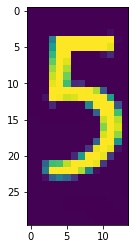

In [13]:
# plt.figure(figsize=(16, 12))
# plt.imshow(image[389:419, 1194:1206])
plt.imshow(cv2.imread("images/match_id/test/match_id04.png", cv2.IMREAD_GRAYSCALE)[380:410, 1192+45:1206+45])

## Match id train 데이터 저장 및 가져오기

In [14]:
match_id_train_x = torch.FloatTensor(match_id_train_x)
match_id_train_y = torch.FloatTensor(match_id_train_y)

# match_id_train_x 저장
with open('data/match_id_train_x.p', 'wb') as file:
    pickle.dump(torch.FloatTensor(match_id_train_x), file)
    
# match_id_train_y 저장
with open('data/match_id_train_y.p', 'wb') as file:
    pickle.dump(torch.FloatTensor(match_id_train_y), file)
    
# match_id_train_x 불러오기
with open('data/match_id_train_x.p', 'rb') as file:
    match_id_train_x = pickle.load(file)
    
# match_id_train_y 불러오기
with open('data/match_id_train_y.p', 'rb') as file:
    match_id_image_y = pickle.load(file)

In [15]:
# plt.imshow(image)
# torch.FloatTensor(image).size()

In [16]:
# match_id_train_x.size()

In [17]:
dataset     = TensorDataset(match_id_train_x, match_id_train_y)
data_loader = DataLoader(dataset, batch_size=1, num_workers=1, shuffle=True)
print(match_id_train_x.size())
print(match_id_train_y.size())

x = match_id_train_x.size()[2]
y = match_id_train_x.size()[1]

torch.Size([600, 30, 14])
torch.Size([600])


## 모델링

### 선형 모델

In [18]:
# x * y는 이미지 한 장의 크기 30 * 14, 10은 label 값의 종류 수
linear = torch.nn.Linear(x * y, 10, bias=True).to(device)
loss   = torch.nn.CrossEntropyLoss().to(device)
SDG    = torch.optim.SGD(linear.parameters(), lr=0.1)

total_batch     = len(data_loader)
training_epochs = 2000

for epoch in range(training_epochs):
    total_cost = 0
    for X, Y in data_loader:
        X = X.view(-1, x * y).to(device)
        Y = Y.to(device).long()
        
        hypothesis = linear(X)
        cost = loss(hypothesis, Y)
        SDG.zero_grad()
        cost.backward()
        SDG.step()
        total_cost += cost
    avg_cost = total_cost / total_batch
    if (epoch + 1) % 100 == 0:
        print("Epoch:", "%03d" % (epoch + 1), "cost =", "{:.9f}".format(avg_cost))

Epoch: 100 cost = 5964.176269531
Epoch: 200 cost = 4997.102539062
Epoch: 300 cost = 6333.907226562
Epoch: 400 cost = 5114.937011719
Epoch: 500 cost = 6048.931152344
Epoch: 600 cost = 4629.301757812
Epoch: 700 cost = 4907.395996094
Epoch: 800 cost = 4662.386718750
Epoch: 900 cost = 4890.336425781
Epoch: 1000 cost = 4474.355957031
Epoch: 1100 cost = 4229.710449219
Epoch: 1200 cost = 3764.475341797
Epoch: 1300 cost = 5263.577636719
Epoch: 1400 cost = 4567.566406250
Epoch: 1500 cost = 4376.449218750
Epoch: 1600 cost = 3960.745117188
Epoch: 1700 cost = 4054.337402344
Epoch: 1800 cost = 4828.504394531
Epoch: 1900 cost = 4070.910400391
Epoch: 2000 cost = 3707.462890625


### CNN

In [40]:
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2048, out_features=625, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=2048, out_features=625, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc2): Linear(in_features=625, out_features=10, bias=True)
)

In [26]:
# 30 * 14, 600
# match_id_train_x.size()
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [31]:
model         = CNN().to(device)
learning_rate = 0.001


criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 600


In [39]:
model

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2048, out_features=625, bias=True)
  (layer4): Sequential(
    (0): Linear(in_features=2048, out_features=625, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
  )
  (fc2): Linear(in_features=625, out_features=10, bias=True)
)

In [38]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y느 ㄴ레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [32, 1, 3, 3], but got 3-dimensional input of size [1, 30, 14] instead

## 검증

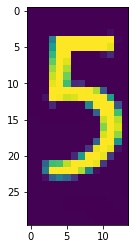

In [24]:
# plt.imshow(cv2.imread("images/match_id/test/match_id02.png", cv2.IMREAD_GRAYSCALE)[380:410, 1192:1356])
plt.imshow(cv2.imread("images/match_id/test/match_id04.png", cv2.IMREAD_GRAYSCALE)[380:410, 1192+45:1206+45])
# plt.imshow(cv2.imread("images/match_id/train/match_id01.png", cv2.IMREAD_GRAYSCALE)[380:410, 1192:1206])

In [23]:
test = cv2.imread("images/match_id/test/match_id04.png", cv2.IMREAD_GRAYSCALE)[380:410, 1192+44:1206+44]
# test = cv2.imread("images/match_id/train/match_id01.png", cv2.IMREAD_GRAYSCALE)[380:410, 1192:1206]
test = torch.FloatTensor(test)

# plt.imshow(test[380:410, 1192:1206])
x_test = test.view(-1 , x * y).float().to(device)
# y_test = torch.FloatTensor([5, 5, 2, 0, 6, 3, 2, 4, 8, 8]).to(device)
y_test = torch.FloatTensor([5]).to(device)

prediction = linear(x_test)
torch.argmax(prediction, 1)
# correct_prediction = torch.argmax(prediction, 1) == y_test
# accuracy = correct_prediction.float().mean()
# print('Accuracy:', accuracy.item())

tensor([6])

In [ ]:
# with torch.no_grad():
#     X_test = time_train_x.view(-1, x * y).float().to(device)
#     Y_test = time_train_y.to(device)
    
#     # torch.argmax(prediction, 1) 하면 모델의 예측 숫자를 알 수 있다.
#     prediction = linear(X_test)
#     correct_prediction = torch.argmax(prediction, 1) == Y_test
#     accuracy = correct_prediction.float().mean()
#     print('Accuracy:', accuracy.item())

In [115]:
# # 딥러닝 모델 객체 저장
# with open('models/match_id_recognizition.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
#     pickle.dump(linear, file)

# 플레이타임 인식기

In [6]:
# img_root     = os.path.join("images")
# images       = []
# time_train_x = []
# time_train_y = []
# device       = 'cuda' if torch.cuda.is_available() else 'cpu'

# # 0~9까지여야 함
# # image size:(20 * 10)
# for n in range(1, 10):
#     img_path = f"{img_root}/number{n}.png"
#     image      = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
#     time_train_x.append(image[75:95, 977:987])
#     time_train_y.append(n)
#     images.append(image)
    
# time_train_x = torch.FloatTensor(time_train_x)
# time_train_y = torch.FloatTensor(time_train_y)

# dataset     = TensorDataset(time_train_x, time_train_y)
# data_loader = DataLoader(dataset, batch_size=1, num_workers=1, shuffle=True)
# time_train_x.size()

torch.Size([9, 20, 10])

In [7]:
# # 200은 이미지 한 장의 크기 20 * 10, 10은 label 값의 종류 수
# linear = torch.nn.Linear(20*10, 10, bias=True).to(device)
# loss   = torch.nn.CrossEntropyLoss().to(device)
# SDG    = torch.optim.SGD(linear.parameters(), lr=0.1)

# total_batch     = len(data_loader)
# training_epochs = 500

# for epoch in range(training_epochs):
#     total_cost = 0
#     for X, Y in data_loader:
#         X = X.view(-1, 20 * 10).to(device)
#         Y = Y.to(device).long()
        
#         hypothesis = linear(X)
#         cost = loss(hypothesis, Y)
#         SDG.zero_grad()
#         cost.backward()
#         SDG.step()
#         total_cost += cost 
#     avg_cost = total_cost / total_batch
#     if (epoch + 1) % 10 == 0:
#         print("Epoch:", "%03d" % (epoch + 1), "cost =", "{:.9f}".format(avg_cost))

Epoch: 010 cost = 86454.445312500
Epoch: 020 cost = 70614.531250000
Epoch: 030 cost = 79682.250000000
Epoch: 040 cost = 76671.898437500
Epoch: 050 cost = 76077.406250000
Epoch: 060 cost = 73641.312500000
Epoch: 070 cost = 75857.445312500
Epoch: 080 cost = 60789.902343750
Epoch: 090 cost = 51490.046875000
Epoch: 100 cost = 45881.675781250
Epoch: 110 cost = 74261.125000000
Epoch: 120 cost = 47708.796875000
Epoch: 130 cost = 59264.328125000
Epoch: 140 cost = 73655.429687500
Epoch: 150 cost = 47024.140625000
Epoch: 160 cost = 50484.542968750
Epoch: 170 cost = 42131.164062500
Epoch: 180 cost = 51657.542968750
Epoch: 190 cost = 61807.035156250
Epoch: 200 cost = 67775.914062500
Epoch: 210 cost = 58203.082031250
Epoch: 220 cost = 49306.746093750
Epoch: 230 cost = 58388.000000000
Epoch: 240 cost = 38355.964843750
Epoch: 250 cost = 52776.535156250
Epoch: 260 cost = 32678.445312500
Epoch: 270 cost = 49480.652343750
Epoch: 280 cost = 55001.164062500
Epoch: 290 cost = 34287.125000000
Epoch: 300 cos

In [8]:
# with torch.no_grad():
#     X_test = time_train_x.view(-1, 200).float().to(device)
#     Y_test = time_train_y.to(device)
    
#     # torch.argmax(prediction, 1) 하면 모델의 예측 숫자를 알 수 있다.
#     prediction = linear(X_test)
#     correct_prediction = torch.argmax(prediction, 1) == Y_test
#     accuracy = correct_prediction.float().mean()
#     print('Accuracy:', accuracy.item())

Accuracy: 1.0


In [10]:
# # 딥러닝 모델 객체 저장
# with open('number_recognizition.p', 'wb') as file:    # james.p 파일을 바이너리 쓰기 모드(wb)로 열기
#     pickle.dump(linear, file)

# 딥러닝 모델 가져오기

In [2]:
# 인플레이 시간 숫자 인식 모델 가져오기
with open('number_recognizition.p', 'rb') as file:    # james.p 파일을 바이너리 읽기 모드(rb)로 열기
    number_recognizition = pickle.load(file)

# 전적에서 match id 인식 모델 가져오기
with open('match_id_recognizition.p', 'rb') as file:    # james.p 파일을 바이너리 읽기 모드(rb)로 열기
    match_id_recognizition = pickle.load(file)
    
print(number_recognizition)
print(match_id_recognizition)

Linear(in_features=200, out_features=10, bias=True)
Linear(in_features=450, out_features=10, bias=True)


# 매크로
- m1 디스플레이 1440 * 900

In [23]:
def get_mouse_position(interval=2):
    sleep(interval)
    position = pyautogui.position()
    
    return position

def is_program_running(program_name):
    for p in psutil.process_iter():
        if p.name() == "LeagueofLegends":
            return True
    
    return False

In [30]:
# # 현재 디스플레이 크기
# print(pyautogui.size())

get_mouse_position(interval=3)

Point(x=1035, y=179)

In [ ]:
# Point(x=660, y=315)
# Point(x=660, y=415)

In [61]:
summoner_info       = pyautogui.Point(x=761, y=104)
summoner_search_bar = pyautogui.Point(x=904, y=159)
match_record        = pyautogui.Point(x=487, y=154)
match_detail        = pyautogui.Point(x=660, y=315) # 다음 매치 클릭 좌표는 y + 100
replay_button       = pyautogui.Point(x=1040, y=170)
close_button        = pyautogui.Point(x=1105, y=137)
delete_search       = pyautogui.Point(x=1050, y=170)

replay_x           = 820
replay_y           = 310
replay_y_tolerance = 80
replay_button = pyautogui.Point(x=1035, y=180)

6474661461


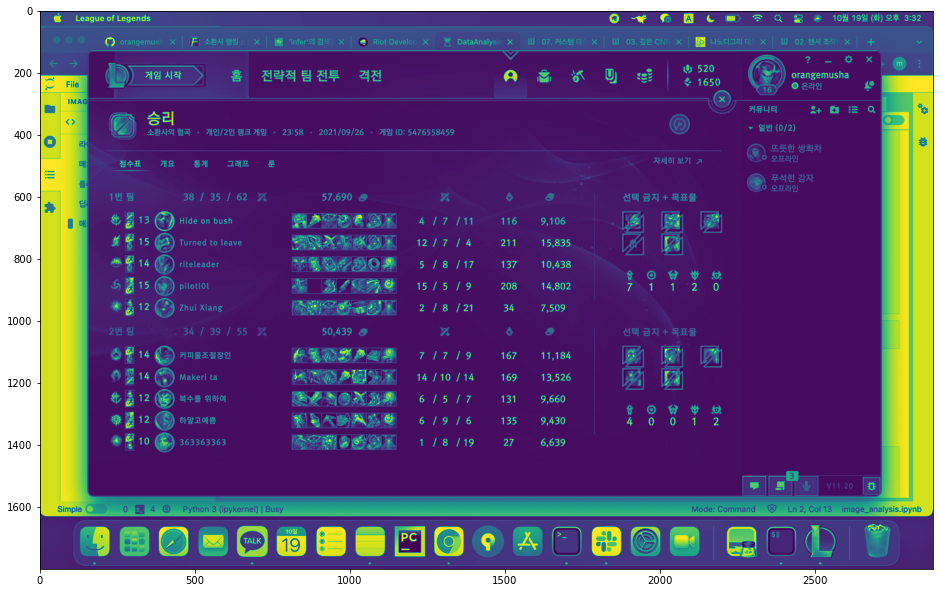

In [71]:
sleep(2)
pyautogui.moveTo(summoner_info)
pyautogui.click()

sleep(1)
pyautogui.moveTo(summoner_search_bar)
pyautogui.click()

sleep(1.5)
pyautogui.write('hide on bush')
sleep(1.5)
pyautogui.press('enter')

sleep(3)
pyautogui.moveTo(match_record)
pyautogui.click()
    
sleep(3)
pyautogui.moveTo(match_detail)
pyautogui.click()

sleep(1.5)
prediction_id = ""
for i in range(10):
    pyautogui.screenshot(f"images/match_detail_id.png")
    sample_image = cv2.imread("images/match_detail_id.png", cv2.IMREAD_GRAYSCALE)
    
    start_x = 1190 + (15*i)
    end_x   = 1205 + (15*i)
    
    image = torch.FloatTensor(sample_image[370:400, start_x:end_x])
    image = image.view(-1, 30 * 15).float().to(device)
    
    prediction = torch.argmax(match_id_recognizition(image), 1)
    prediction = str(int(prediction[0]))
    prediction_id += prediction
    
print(prediction_id)

plt.figure(figsize=(16, 12))
plt.imshow(sample_image)


# replay 다운로드
# sleep(1.5)
# pyautogui.moveTo(replay_button)
# pyautogui.click()

# # replay 실행
# sleep(3)
# pyautogui.click()

# sleep(5)

# sleep(1.5)
# pyautogui.moveTo(close_button)
# pyautogui.click()

In [66]:
print(prediction_id)
sample_image

4797777274


array([[59, 59, 59, ..., 34, 34, 34],
       [59, 59, 58, ..., 34, 34, 34],
       [58, 59, 59, ..., 34, 34, 34],
       ...,
       [24, 27, 25, ..., 21, 24, 24],
       [22, 25, 25, ..., 23, 24, 26],
       [25, 21, 21, ..., 24, 22, 22]], dtype=uint8)

In [104]:
# plt.figure(figsize=(16, 12))
# pyautogui.screenshot("images/sample.png")
# # cv2.imread("images/sample.png", cv2.IMREAD_GRAYSCALE)
# a = cv2.imread("images/number7.png")


# # plt.imshow(a)
# plt.imshow(a[75:95, 1265:1275])
# # plt.imshow(a[75:95, 1274:1284])
# # plt.imshow(a[75:95, 1287:1297])
# # plt.imshow(a[75:95, 1297:1307])

In [103]:
# b = torch.FloatTensor(a[75:95, 1297:1307]).view(-1, 200).float().to(device)
# torch.argmax(number_recognizition(b))
             
# with torch.no_grad():
#     X_test = time_train_x.view(-1, 200).float().to(device)
#     Y_test = time_train_y.to(device)

#     # torch.argmax(prediction, 1) 하면 모델의 예측 숫자를 알 수 있다.
#     prediction = linear(X_test)
#     correct_prediction = torch.argmax(prediction, 1) == Y_test
#     accuracy = correct_prediction.float().mean()
#     print('Accuracy:', accuracy.item())

tensor(18)

In [ ]:
# pyautogui.screenshot(f"images/sample.png")

In [106]:
# orb = cv2.ORB_create()
# kp1, des1 = orb.detectAndCompute(img1, None)
# kp2, des2 = orb.detectAndCompute(img2, None)

# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# matches = bf.match(des1,des2)
# matches = sorted(matches, key = lambda x:x.distance)

# bf = cv2.BFMatcher()

# matches = bf.knnMatch(des1, des2, k=2)
# good = []
# for m, n in matches:
#     if m.distance < 0.75 * n.distance:
#         good.append([m])
    
    
# plt.figure(figsize=(16, 12))
# knn_image = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None, flags=2)
# plt.imshow(knn_image)
# plt.show()

In [18]:
# a.reverse()
a

[6, 5, 4, 3, 2, 1]

In [34]:
# report = {"동훈": {"수학": 90, "과학": 80},
#          "성원": {"수학": 70, "과학": 86},
#          "유진": {"수학": 95, "과학": 73}}

# best_name = "동훈"
# best_avg  = 78
# for name in report:
#     math    = report[name]["수학"]
#     science = report[name]["과학"]
#     avg     = (math + science) / 2
#     print(f"name: {name}, avg: {avg}")
    
#     if best_avg < avg:
#         best_name = name
#         best_avg  = avg
        
# print(f"{best_name}: {best_avg}")

name: 동훈, avg: 85.0
name: 성원, avg: 78.0
name: 유진, avg: 84.0
동훈: 85.0
